In [2]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

# What are Neural Networks?
### Warning 45 min is NOT enough time to explain Neural Networks. (It is barely enough time to talk about gradient descent)... but here goes

Neural networks, in a single line, attempt to iteratively train a set (or sets) of weights that, when used together, return the most accurate predictions for a set of inputs. 

Neural networks do this by establishing sets of neurons (known as hidden layers) that take in some sort of input(s), apply a weight, and pass that output onward. As we feed more data into the network, it adjusts those weights based on the output of the loss function, until we have highly trained and specific weights.

![](./images/neuralnet.png)

## Mapping out a Network

There are a lot of moving parts with Neural Networks. We'll be playing along with the very well known [Tensorflow Playground](http://playground.tensorflow.org/) as we talk about the structure of this neural networks. This website simulates a fairly small network in your browser and lets you tweak values and immediately realize their effects.

### Anatomy
- Input Nodes (input layer): 
    - No computation is done here within this layer
    - Simply passes the information to the next layer (hidden layer most of the time).
<br><br>
- Hidden nodes (hidden layer): 
    - Is where intermediate processing or computation is done, they perform computations and then transfer the weights (signals or information) from the input layer to the following layer (another hidden layer or to the output layer). 
    - It is possible to have a neural network without a hidden layer and I’ll come later to explain this.
<br><br>
- Output Nodes (output layer): 
    - Here we finally use an activation function that maps to the desired output format (e.g. softmax for classification).
    
<br><br>
### Key Concepts
- Connections and weights: 
    - The network consists of connections, each connection transferring the output of a neuron i to the input of a neuron j. In this sense i is the predecessor of j and j is the successor of i, Each connection is assigned a weight Wij.
<br><br>
- Activation function: 
    - the activation function of a node defines the output of that node given an input or set of inputs. A standard computer chip circuit can be seen as a digital network of activation functions that can be “ON” (1) or “OFF” (0), depending on input. This is similar to the behavior of the linear perceptron in neural networks. However, it is the nonlinear activation function that allows such networks to compute nontrivial problems using only a small number of nodes. In artificial neural networks this function is also called the transfer function.
<br><br>
- Learning rule: 
    - The learning rule is a rule or an algorithm which modifies the parameters of the neural network, in order for a given input to the network to produce a favored output. This learning process typically amounts to modifying the weights and thresholds.


### What we know already

#### Features (What the input layer take in)

Much like our other machine learning techniques, we do need to feed data into the network. For these smaller examples, we won't worry too much about the shape of our data, but typically having data normalized to be on scale between 0 and 1 (or -1 and 1) can help the network find a solution faster than when it would otherwise.

#### Outputs

Much like other supervised techniques, we need an output at the end as well. In most cases:

- for a regression style technique, one output is usually fine
- for a classification technique, one output per class is a good idea

### Old Concep

#### Linear Regression

<img src="https://cdn-images-1.medium.com/max/1600/1*_TqRJ9SmwFzRigJhMiN2uw.png" width="400">

### New Concepts

#### Neurons

<img src="https://sebastianraschka.com/images/faq/logisticregr-neuralnet/schematic.png" width="400">


A neural network (at its core) is built up of different neurons that are linked together. Each takes in either the original input features or some transformed version of them and puts out a value (or set of values). One neuron looks something akin to this:

Each neuron is going to be the combination of the following:

- A **bias** term (akin to a constant or $B_0$ term in a linear regression)
- The input terms they've received, each multiplied by a **weight**

If our model has one neuron, this looks suspiciously similar to a linear regression:

1. take each term
2. multiply it by a weight
3. sum those new values together 
4. add an additional bias term

That output should, as we train our neural network, get closer and closer to what the output is for that specific set of inputs ($x_1...x_n$). As we'll see, the way we train the network and the way we transform our outputs (plus the number of neurons) distinguishes neural networks from linear regression quite strongly.

### Hidden Layers

What makes neural networks tick is the idea of *hidden layers*. Hidden does not mean anything particularly devious here, just that it is not the input or the output layer.

Hidden layers can have:
- any number of neurons per layer 
- can be of any number in your model**

At each layer each neuron in that layer receives the same weight. However, each neuron is going to transform the data in a different way, based on how we assign or change the weights and bias in that neuron. 

![](./images/neuralnet.png)

For the network above, we have two hidden layers and one output layer.

- Hidden Layer 1
    - 4 Neurons
    - Each Neuron has 6 weights and 1 bias term
    - Inputs: the original data
    - Outputs: one number each
- Hidden Layer 2
    - 3 Neurons 
    - Each Neuron has 4 weights and 1 bias term
    - Inputs: the four outputs from each Neuron in Hidden Layer 1
    - Outputs: one number each
- Output Layer
    - 1 Neuron
    - The one nNuron has 3 weights and 1 bias term
    - Inputs: the three outputs from each Neuron in Hidden Layer 2
    - Outputs: the final prediction

### Check for Understanding 1 (3 Minutes)

With a partner, answer the following about the network below:

![](./images/percept.png)

1. How many layers are in this network? Are they an input, output, or hidden layer? How many neurons are in each layer?
2. For your hidden and output layers:
    1. How many inputs does each neuron have?
    2. How many outputs does each neuron have?

### Activation

So how exactly does information/data propogate through the network?

We can write the equation for the activation of the $j$th neuron in the $i$th layer as:

### $$ a_j^i = \sigma \left( \sum_k w_{jk}^i a_k^{i-1} + b_j^i \right)$$

There is a decent amount going on in this equation. We will examine the pieces.

- $a_j^i$ represents the activation of the $j$th neuron in the $i$th layer. Note that the superscript corresponds to the layer number and the subscript corresponds to the neuron number within the layer.

- $a_k^{i-1}$ is the activation of the $k$th neuron in the $i-1$th layer.

- $\sigma$ represents an "activation function". More on this later, but it is a function that can transform the activation of neurons. The simplest activation function is the linear activation, $f(x) = x$.

- $w_{jk}^i$ represents the weight of the activation in the $k$th neuron in the $i-1$ layer to the $j$th neuron in the $i$th layer. So, $j$ is the destination neuron in the $i$ layer. $k$ is the departure neuron in the previous layer.

- $b_j^i$ is the "bias" of the $j$th neuron in the $i$th layer. The bias adds a constant to the value of the activation.

The gist of the equation is that each neuron is a sum of the weighted activations of neurons that feed into it plus a "bias" value, all fed through a final activation function.

The formula becomes cleaner in matrix notation. Here is the vectorized version of the formula above:

### $$ a^i = f(W^i a^{i-1} + b^i) $$

Now there is a weight matrix $W^i$ for each layer $i$. The weight matrix defines the weightings on the previous layer neuron activations to the neurons of the current layer. 

![](./images/activation.png)

Neurons also have an activation function that transforms the output in a certain way. Some common examples are:

- [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks): Also known as a Rectified Linear Unit, this turns the output to 0 if the output would be less than 0 (i.e., take the output and feed it through $f(y) = max(0, y)$). This means that the neuron is activated when its output is positive and not activated otherwise. This has the intuitive effect of turning a neuron "on" in certain cases and off in other cases.
- [Softmax](https://en.wikipedia.org/wiki/Softmax_function): Used frequently at the output layer, this essentially "squishes" a bunch of inputs into a normalized scale of 0-1, which is great for creating something akin to a probability of falling into a given class. 
- [Sigmoid or Logistic](https://en.wikipedia.org/wiki/Logistic_function): Much like how we transformed the linear regression model to change the output to a zero or one through the use of a logistic or sigmoid function, we can do the same as an activation to squash the output to a scale between 0 and 1. 

There's a wealth of information on different types of activation functions within [this article](https://en.wikipedia.org/wiki/Activation_function) -- different activation functions, hidden layers, and neurons per layer can change how effective your neural network will be!

Typically, we'll apply the weights in our neurons, add the bias and sum all terms, then pass that one value through the activation function, like this:

<img src="https://qph.fs.quoracdn.net/main-qimg-c30cd7a69de020b4f8581db3ba8f8508.webp" width="600">




### Picking a Topology for your Network

There's no hard and fast rule for how to pick a topology for your neural network. Much like hyperparameters in other machine learning models, we're going to use a combination of experience, research, and exploration to come up with a topology that best suits our unique problem. One good place to start out is to (if you have a smaller set of input features) is a network with:

1. The input layer
2. One hidden layer with a number of neurons equal to the number of inputs
3. One output layer with the appropriate activation function (softmax if you have a classification problem, no activation (or what's known as the identity function ($f(x) = x$) if you have a regression problem

See also: [the "zoo" neural nets](http://www.asimovinstitute.org/neural-network-zoo/)

### Single Layer and Multilayer Perceptrons (SLP and MLP)

The types of neural networks that we have discussed so far are known as perceptrons. A single layer perceptron **has no hidden layers** and is just a function of the inputs, weights, a bias term, and an activation function:

![](./images/slp.png)

Multilayer perceptrons (MLP) have 1 or more hidden layers in addition to their input and output layers. While SLPs are easiest to consider in an abstract sense, MLPs tend to be much more accurate and useful in practice. 

## Training your network (We may need to brush over)

So far, we haven't discussed how a neural network assigns the "right" weights to each of its neurons. You could imagine a neural network with very bad weights that predicted poorly or, in some cases, completely counter to what it should. How do we train our network to have the right weights?

Training our network to have the right weights relies on a couple of topics:

1. A loss function that we are trying to optimize the values for
2. The concept of forward and backward propogation 
3. Gradient Descent and a Learning Rate to make iterative changes to the weights

### Loss Functions

We have encountered [loss functions](https://en.wikipedia.org/wiki/Loss_function) many times before -- they are functions that take in the actual values for the output and what our model predicts those values to be and gives us a value that we are trying to minimize with our model. Examples include:

##### Regression: Sum of Squared Errors

$$\sum(y_i - \hat{y}_i)^2$$

##### Classification: Mean accuracy 

$$\frac{n_{\text{classified correctly}}}{n_{\text{total}}}$$

We're going to use loss functions in this context to tell us how well or how poorly our Neural Network is doing at that point.

### Forward and Backpropagation 

When we train our neural network, **we send our data multiple times through the network and tweak the weights each time**. This is an iterative process using forward and backpropagation.


#### Forward Propagation

Forward Propagation is straightforward -- either in batches or as individual observations, pass the training data through the network, applying all the weights, biases, and activation functions as usual. At this point, you should have actual and predicted values.

#### Backpropagation

What we want to do here is:

1. See how far off we were from the truth using the loss function
2. Identify which weights in our network are most responsible for how far we are off
3. Change all of the weights to make our model more accurate, changing the weights that are "the worst" the most

This is known as **Backpropagation** -- we are taking the errors we see in our model (as it stands currently) and are distributing them backwards to the rest of the layers. 

What we'll do is train our data in a number of full passes known as **epochs**. As modelers, we'll choose a number of epochs to train our model, essentially choosing a value to stop where we see no additional change in the accuracy of our models. 

#### Changing Weights (the Curse of Dimensionality) 

One question that you may have is "Why don't we just try all of the weights and decisively find the best one?" The problem here (which is often known as the curse of dimensionality) is that we have _so many different weights_ to try out (and so many different sets of values to exhaustively attempt) that it's impractical to try all of them. More than being impractical, for larger models with many weights and many possible values, we may still be estimating the "best" weights long past the [heat death of the universe](https://en.wikipedia.org/wiki/Heat_death_of_the_universe). 

#### **Estimating** the Weights 

What we'll do instead is use gradient descent to help us figure out what direction to tweak our weights. We've discussed gradient descent before, but as a quick primer: 

> Gradient Descent is an optimization technique to help us find the lowest point (global minima) of a function. The derivative (the rate of change in the function for a small change in the inputs) of a function at a given point tells which direction we would like to change our weights. We'll make changes of a certain size in the right direction until we hit a place where the derivative is zero (i.e., either direction will increase the output of the function) and will consider that our "best" place. 

- **Learning Rate**: The size of the change we make on each pass -- bigger learning rates mean we'll move faster, but may skip over places where there is actually a global minima
- **Epoch**: The number of times we pass our data through the fitting process

![](./images/gradient.png)
<img src="https://www.cs.toronto.edu/~frossard/post/linear_regression/sgd.gif" width="500"><br><br>
<img src="https://media.giphy.com/media/O9rcZVmRcEGqI/giphy.gif" width="600">

For our purposes, the function we're trying to optimize is the loss function from above -- we want the value of that function to be as low as possible. Our loss function is a function of all of the weights in our network. What we'll do in an abstract sense is:

1. Take the partial derivative (in other words, changing one weight and not all) of our loss function with respect to each weight in our model
2. Based on that derivative, change the weights up or down

The actual process is somewhat more complicated than that (see below), but the takeaway is backpropagation **looks at how badly we did on each pass, moves those errors back up the model, and then uses gradient descent to change the weight over a series of iterations**.

![](./images/backprop.jpg)
<img src="https://thumbs.gfycat.com/UnsteadyUnkemptKangaroo-size_restricted.gif" width="600">


##### The Vanishing Gradient Problem

One thing to keep in mind (and a good reason to not create networks that are very, very deep) is a phenomenon known as the Vanishing Gradient Problem. For networks with lots of hidden layers, earlier layers train at a much slower rate than layers closer to the output (the gradient "vanishes" as it gets deeper into the network, so the weights cannot change as much). That means that it can take a much longer time to train a deeper network without much increase in accuracy. 

### Tackling Overfitting

Do neural networks overfit? Yes, very much so. There are many weights to optimize and we can very quickly reach a point where the weights in each neuron are overfit to our training data (and therefore are limited in how well they predict new data).

#### Regularization

Just like with linear models earlier in this course, we can also do regularization to make sure our weights are more generalizable. Because we're using our loss function to determine how we should change our weights, if we penalize the loss function to avoid larger weights, we will see the same behavior as we did with linear models -- weights will be large or impactful only if they contribute sufficiently to how well the model fits as a whole. 

#### Dropout

We can also use something known as dropout to tackle overfitting. Dropout will turn off a random percentage of neurons in each pass (user-defined). This prevents each layer from fitting too strongly to a given input and therefore wards off overfitting. 

![](./images/dropout.png)

### Check for Understanding 3 (10 Minutes)

In pairs, use the [Tensorflow Playground](http://playground.tensorflow.org/) with the following settings:

![](./images/settings.png)

> make sure that you're using a classification problem (upper right corner as well!)

1. In your own words, define the following and forecast what changing each of them will do to your model?
    1. Learning Rate
    2. Activation Function
    3. Regularization and Regularization Rate
2. Work together with the settings established above to create a (mini!) neural network that best predicts test data. Feel free to try any (or all!) of the inputs, any number of neurons, hidden layers, learning rates, regularization parameters, and activation functions. A good place to start is the following:

![](./images/starting.png)

We'll share our results in Slack after 10 minutes. Include your test loss on the thread. We'll ask the pair with the best score to share their settings for the best possible network. 

### Playing with Simple Neural Networks

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [10]:
print("Training on {} samples, testing on {} samples".format(len(X_train),len(X_test)))

Training on 120 samples, testing on 30 samples


In [11]:
#one hot encoding target

In [12]:
from keras.utils import np_utils
y_train_cat = np_utils.to_categorical(y_train, 3)
y_test_cat = np_utils.to_categorical(y_test, 3)

C:\Users\Namae\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [14]:
y_test_cat

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [15]:
#import
import keras
from keras import regularizers, optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping

In [18]:
#instantiate 
model = Sequential()

#creating network structure
#hidden layer
model.add(Dense(64, activation='relu'))
#output layer
model.add(Dense(3, activation='softmax'))

#creating optimizer
adam = optimizers.Adam(lr=0.10)
model.compile(loss = 'categorical_crossentropy',
              metrics=['accuracy'],
             optimizer = adam)

#early stopping is an addition to stop training once the testing error exceeds training as according to val_loss (the loss in the validation test set)

#fit
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), 
                    epochs=120, 
                    batch_size = 16,
                    verbose=1)

Train on 120 samples, validate on 30 samples
Epoch 1/120
120/120 [==============================] - 0s 2ms/step - loss: 1.9814 - acc: 0.4583 - val_loss: 0.6276 - val_acc: 0.6333
Epoch 2/120
120/120 [==============================] - 0s 75us/step - loss: 0.7006 - acc: 0.6750 - val_loss: 0.6864 - val_acc: 0.6333
Epoch 3/120
120/120 [==============================] - 0s 67us/step - loss: 0.4456 - acc: 0.8417 - val_loss: 0.3162 - val_acc: 0.8000
Epoch 4/120
120/120 [==============================] - 0s 75us/step - loss: 0.2688 - acc: 0.9333 - val_loss: 0.1969 - val_acc: 0.9333
Epoch 5/120
120/120 [==============================] - 0s 117us/step - loss: 0.2365 - acc: 0.8917 - val_loss: 0.2787 - val_acc: 0.8000
Epoch 6/120
120/120 [==============================] - 0s 67us/step - loss: 0.1985 - acc: 0.9083 - val_loss: 0.1538 - val_acc: 0.9667
Epoch 7/120
120/120 [==============================] - 0s 75us/step - loss: 0.0968 - acc: 0.9750 - val_loss: 0.1216 - val_acc: 0.9333
Epoch 8/120
120/1

120/120 [==============================] - 0s 67us/step - loss: 0.0918 - acc: 0.9500 - val_loss: 0.0848 - val_acc: 0.9667
Epoch 62/120
120/120 [==============================] - 0s 67us/step - loss: 0.1546 - acc: 0.9417 - val_loss: 0.0545 - val_acc: 1.0000
Epoch 63/120
120/120 [==============================] - 0s 75us/step - loss: 0.0900 - acc: 0.9750 - val_loss: 0.0518 - val_acc: 0.9667
Epoch 64/120
120/120 [==============================] - 0s 67us/step - loss: 0.1018 - acc: 0.9667 - val_loss: 0.0589 - val_acc: 0.9667
Epoch 65/120
120/120 [==============================] - 0s 75us/step - loss: 0.1866 - acc: 0.9333 - val_loss: 0.1031 - val_acc: 0.9667
Epoch 66/120
120/120 [==============================] - 0s 75us/step - loss: 0.1274 - acc: 0.9500 - val_loss: 0.0989 - val_acc: 0.9667
Epoch 67/120
120/120 [==============================] - 0s 75us/step - loss: 0.1116 - acc: 0.9667 - val_loss: 0.0594 - val_acc: 1.0000
Epoch 68/120
120/120 [==============================] - 0s 67us/step

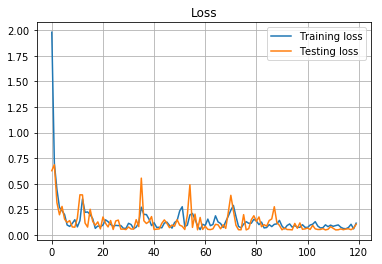

In [19]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
#plt.xticks(history.epoch)
plt.title('Loss')
plt.grid()
plt.legend();

In [20]:
def plot_history():
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    plt.plot(train_loss, label='Training loss')
    plt.plot(test_loss, label='Testing loss')
    #plt.xticks(history.epoch)
    plt.title('Loss')
    plt.grid()
    plt.legend()
    return

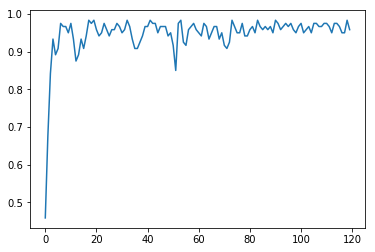

In [21]:
plt.plot(history.history['acc']);

In [22]:
#instantiate 
model = Sequential()

#creating network structure
#hidden layer
model.add(Dense(64, activation='relu'))
#output layer
model.add(Dense(3, activation='softmax'))

#creating optimizer
adam = optimizers.Adam(lr=0.01)
model.compile(loss = 'categorical_crossentropy',
              metrics=['accuracy'],
             optimizer = adam)

#early stopping is an addition to stop training once the testing error exceeds training as according to val_loss (the loss in the validation test set)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='auto')
callbacks_list = [early_stop]

#fit
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), 
                    epochs=120,
                    batch_size=16,
                    callbacks=callbacks_list, 
                    verbose=1)

Train on 120 samples, validate on 30 samples
Epoch 1/120
120/120 [==============================] - 0s 2ms/step - loss: 1.0647 - acc: 0.5750 - val_loss: 0.6141 - val_acc: 0.8333
Epoch 2/120
120/120 [==============================] - 0s 67us/step - loss: 0.6278 - acc: 0.7333 - val_loss: 0.4829 - val_acc: 0.7000
Epoch 3/120
120/120 [==============================] - 0s 75us/step - loss: 0.4735 - acc: 0.7667 - val_loss: 0.4270 - val_acc: 0.8333
Epoch 4/120
120/120 [==============================] - 0s 75us/step - loss: 0.3865 - acc: 0.8833 - val_loss: 0.3323 - val_acc: 0.9667
Epoch 5/120
120/120 [==============================] - 0s 75us/step - loss: 0.3247 - acc: 0.9500 - val_loss: 0.2851 - val_acc: 0.9667
Epoch 6/120
120/120 [==============================] - 0s 67us/step - loss: 0.2853 - acc: 0.9583 - val_loss: 0.2518 - val_acc: 0.9667
Epoch 7/120
120/120 [==============================] - 0s 100us/step - loss: 0.2522 - acc: 0.9083 - val_loss: 0.3028 - val_acc: 0.8667
Epoch 8/120
120/1

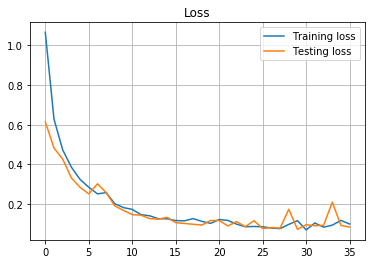

In [23]:
plot_history()

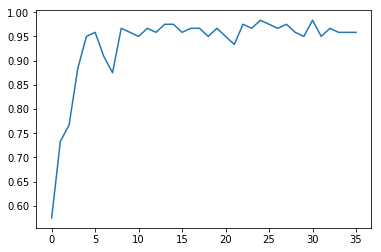

In [24]:
plt.plot(history.history['acc']);

In [26]:
pred=model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [29]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [36]:
score = model.evaluate(X_test,y_test_cat)

30/30 [==============================] - 0s 33us/step


In [40]:
print('Loss : {}\nAccuracy : {}'.format(score[0],score[1]))

Loss : 0.08498851954936981
Accuracy : 1.0


In [ ]:
s

In [28]:
accuracy_score(y_test,pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

### Types of Neural Networks
- LSTM RNN
- MLP
- Autoencoder
- CNN
- Capsule 
... and many more